In [1]:
# Extract Tweet of a Specific person :

#https://fairyonice.github.io/extract-someones-tweet-using-tweepy.html

In [2]:
! pip install tweepy


     |████████████████████████████████| 77 kB 2.4 MB/s             
     |████████████████████████████████| 151 kB 26.7 MB/s            
     |████████████████████████████████| 63 kB 1.1 MB/s             
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
  Attempting uninstall: oauthlib
    Found existing installation: oauthlib 3.1.1
    Uninstalling oauthlib-3.1.1:
      Successfully uninstalled oauthlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
beatrix-jupyterlab 3.1.4 requires google-cloud-bigquery-storage, which is not installed.
tsfresh 0.19.0 requires statsmodels>=0.13, but you have statsmodels 0.12.2 which is incompatible.
apache-beam 2.34.0 requires dill<0

In [3]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [4]:
# 2.Set Connecion

#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials

consumer_key = "t79rVMJuhwLuG4lYcH0thWH96"
consumer_secret = "e6WDVyjFJQnARuotiqDiNyW2tSQenlka478KUf1gLakFYKc8X8"
access_token = "1426797837749145601-tSLuBmGCl1S9RYOiVO0JVQO2NjOjpl"
access_token_secret = "xtSgeOxLrlwpTcE3A1YkCWoMD5nM3w2QtvUTgtxmHx8Ti"



# Use the above credentials to authenticate the API.

auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [5]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [6]:
# We will use api as api.search inside this tweepy cursor.

In [7]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search_tweets, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        
        df.to_csv('{}.csv'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass
        

In [8]:
! pip install openpyxl

     |████████████████████████████████| 242 kB 4.5 MB/s            


In [9]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic=["kashmir"]
get_tweets(Topic , Count=100)

In [10]:
df.head(8)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2022-03-25 07:21:39+00:00,Koshur Buzarg,False,@DBroodingBreed @ShafaqMatto_14 @the_sawqib no...,0,0,الدولة الكشمير
1,2022-03-25 07:21:32+00:00,Ganesh Kumar,False,@BJYM @Tejasvi_Surya @narendramodi @AmitShah @...,0,0,Bharat
2,2022-03-25 07:21:31+00:00,Shitansu89🙏,False,@ashutosh83B @narendramodi @ArvindKejriwal It ...,0,0,"Bengaluru, India"
3,2022-03-25 07:21:30+00:00,The Kashmir Student,False,University of Kashmir | Notice regarding submi...,1,0,"Srinagar, Jammu and Kashmir"
4,2022-03-25 07:21:23+00:00,Nund-e-Boon Qadri,False,@RBhamaria @_sayema Kashmir knows who were tho...,0,0,
5,2022-03-25 07:21:18+00:00,Ganesh Kumar,False,@BJP4Delhi People below poverty line of our co...,0,0,Bharat
6,2022-03-25 07:21:17+00:00,obc Shailendra🙃,False,@Ashok_Kashmir Homosexuality is romantic attra...,0,0,prayagraj
7,2022-03-25 07:21:13+00:00,SwathiRules,False,@Meher7748 @Chirpy175 Thanx to Kashmir Files p...,0,0,


# Analyze the tweets

In [11]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [12]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [13]:
#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Arsenal vs United", we want to remove "Arsenal" "vs" "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new


In [14]:
# Call function to get Clean tweets

df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2022-03-25 07:21:39+00:00,Koshur Buzarg,False,@DBroodingBreed @ShafaqMatto_14 @the_sawqib no...,0,0,الدولة الكشمير,14 sawqib nobody has an issue with indian bein...
1,2022-03-25 07:21:32+00:00,Ganesh Kumar,False,@BJYM @Tejasvi_Surya @narendramodi @AmitShah @...,0,0,Bharat,surya people below poverty line of our country...
2,2022-03-25 07:21:31+00:00,Shitansu89🙏,False,@ashutosh83B @narendramodi @ArvindKejriwal It ...,0,0,"Bengaluru, India",it is purely politics indirectly opposing bjp ...
3,2022-03-25 07:21:30+00:00,The Kashmir Student,False,University of Kashmir | Notice regarding submi...,1,0,"Srinagar, Jammu and Kashmir",university of kashmir notice regarding submiss...
4,2022-03-25 07:21:23+00:00,Nund-e-Boon Qadri,False,@RBhamaria @_sayema Kashmir knows who were tho...,0,0,,sayema kashmir knows who were those people and...


In [15]:
# Call function to get the Sentiments

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2022-03-25 07:21:39+00:00,Koshur Buzarg,False,@DBroodingBreed @ShafaqMatto_14 @the_sawqib no...,0,0,الدولة الكشمير,14 sawqib nobody has an issue with indian bein...,Neutral
1,2022-03-25 07:21:32+00:00,Ganesh Kumar,False,@BJYM @Tejasvi_Surya @narendramodi @AmitShah @...,0,0,Bharat,surya people below poverty line of our country...,Neutral
2,2022-03-25 07:21:31+00:00,Shitansu89🙏,False,@ashutosh83B @narendramodi @ArvindKejriwal It ...,0,0,"Bengaluru, India",it is purely politics indirectly opposing bjp ...,Positive
3,2022-03-25 07:21:30+00:00,The Kashmir Student,False,University of Kashmir | Notice regarding submi...,1,0,"Srinagar, Jammu and Kashmir",university of kashmir notice regarding submiss...,Neutral
4,2022-03-25 07:21:23+00:00,Nund-e-Boon Qadri,False,@RBhamaria @_sayema Kashmir knows who were tho...,0,0,,sayema kashmir knows who were those people and...,Neutral


In [16]:
# Check Summary of Random Record
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 @sardesairajdeep @htTweets The Kashmir Files: A tragedy that should be retold 100 times till justice is done !!!

Clean tweet:
 the kashmir files a tragedy that should be retold 100 times till justice is done

Sentiment of the tweet:
 Neutral


In [17]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['kashmir'] are : 101
Total Positive Tweets are : 36
Total Negative Tweets are : 19
Total Neutral Tweets are : 46


In [18]:
df["Sentiment"].value_counts()

Neutral     46
Positive    36
Negative    19
Name: Sentiment, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

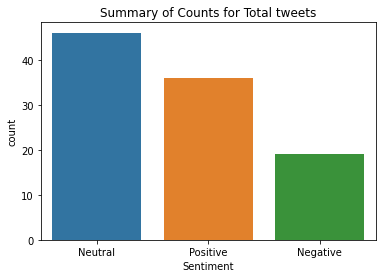

In [19]:
#sns.countplot(df["Sentiment"],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")


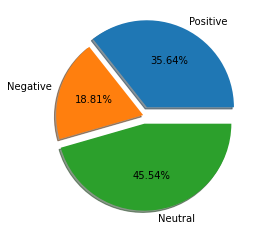

In [20]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

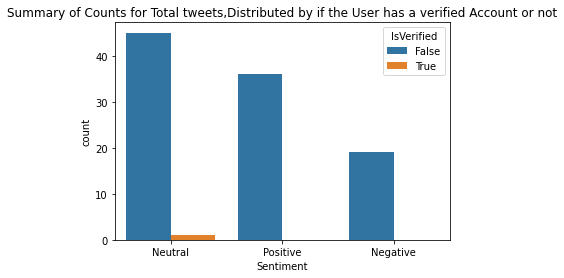

In [21]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

# Generate WordCloud

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

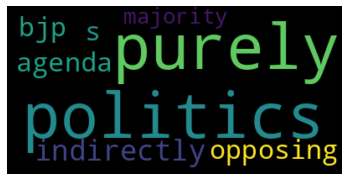

In [23]:
# Start with one review:

text = df.clean_tweet[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- **WordCloud for whole data(Topic not included in WordCloud)**

There are 9134 words in the combination of all review.


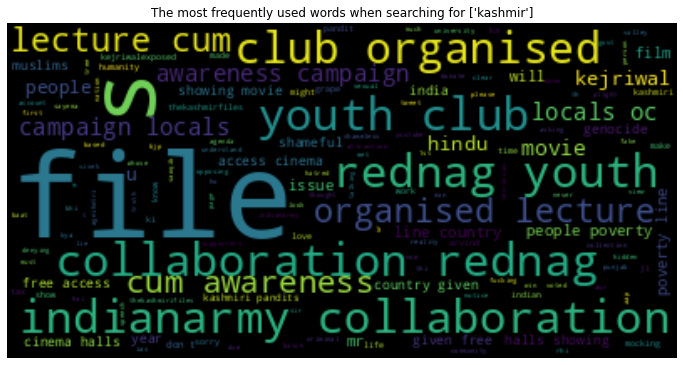

In [24]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = " ".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

## NEW

- **Wordcloud for Positive tweets only (Topic not included in WordCloud)**

There are 9134 words in the combination of all review.


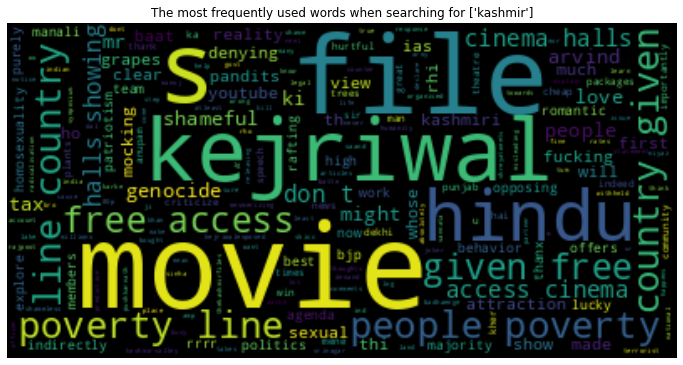

In [25]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

- **Wordcloud for Negative tweets only  (Topic not included in WordCloud)**

There are 9134 words in the combination of all review.


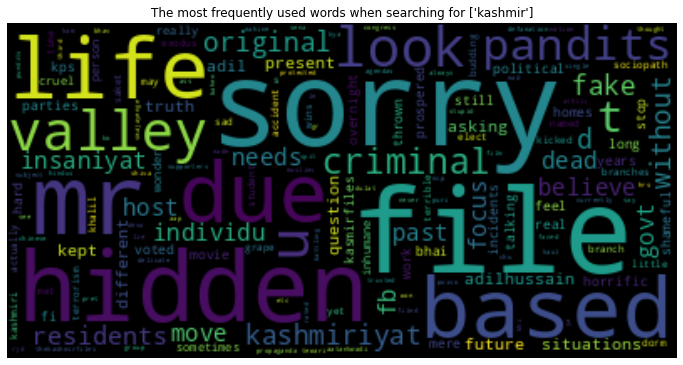

In [26]:
# Combine Negative reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

#text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

# Import image in streamlit.

import streamlit as st
from PIL import Image
import os
os.chdir("F:/Machine Learning/AI ML/Case Studies/Flask/TwitterFromScratch")
image = Image.open('Logo.jpg')
st.image(image, caption='Sunrise by the mountains',use_column_width=True)
st.pyplot()